<div style="background-color: lightblue; padding: 40px; font-size: 40px;">
             Random Forest
</div>

#### What is a Random Forest?
#### An ensemble machine learning algorithm used for predicting categorical target variables

How do we use Random Forest?
- acquire, prepare, explore our data
- split data for modeling
- build models on train
- create rules based on our input data
- evaluate models on train & validate
- see how our rules work on unseen data
- pick best of the best model, and evaluate bestest model on test

## Exercises

In [4]:
#Tabular data imports:
import pandas as pd
import numpy as np

#Visualization imports:
import matplotlib.pyplot as plt

#Imports we need for assessing the performance of our model:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


#Importing the functions for fetching the data:
from acquire import new_titanic_data
    

#Importing functions for prepping the data that's fetched and for splitting the data:
from prepare import prep_titanic, split_function


### Use Titanic data 

## Acquire & Prepare data

In [10]:
# Acquire and prepare data 
titanic = prep_titanic(new_titanic_data())
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


## Train, validate, split data

In [17]:

train, validate, test = split_function(titanic, 'survived')

In [15]:
# Counts for target value: survived
train.survived.value_counts()

survived
0    329
1    204
Name: count, dtype: int64

### Isolate the tagret variable

In [18]:
# Defining X and y for train, validate and test
X_train = train.drop(columns='survived')
y_train = train.survived

X_val = validate.drop(columns='survived')
y_val = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

In [19]:
X_train.head()

,passenger_id,pclass,sex,sibsp,parch,fare,embark_town,alone
627,627,1,1,0,0,77.9583,0,1
390,390,1,0,1,2,120.0000,0,0
492,492,1,0,0,0,30.5000,0,1
622,622,3,0,1,1,15.7417,2,0
243,243,3,0,0,0,7.1250,0,1


### Create the baseline

In [20]:
#Baseline prediction for a classification problem is predicting the most prevelant class(the mode)

baseline = y_train.mode()
baseline_accuracy = y_train == 0
print(f"Baseline prediction: {(baseline[0])}")
print(f"Baseline accuracy: {(baseline_accuracy.mean())}")

Baseline prediction: 0
Baseline accuracy: 0.6172607879924953


### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [43]:
#create the model
forest1 = RandomForestClassifier(min_samples_leaf= 1, max_depth=10, random_state=42)
forest1

RandomForestClassifier(max_depth=10, random_state=42)

In [44]:
#fit the model

forest1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [26]:
#get the predictions
y_predictions = forest1.predict(X_train)
y_predictions

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [45]:
def get_metrics(model,xtrain,ytrain,xtest,ytest):
    
    labels = sorted(y_train.unique())
    
    # OUTPUTS AN ARRAY OF PREDICTIONS
    preds = model.predict(xtest)
    print("Accuracy Score:", model.score(xtest,ytest))
    print()
    print('Confusion Matrix:')
    conf = confusion_matrix(ytest,preds)
    conf = pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])
    print(conf)
    print()
    print("Classification Report:")
    print(classification_report(ytest, preds))


In [50]:
get_metrics(forest1,X_train,y_train,X_test,y_test)


Accuracy Score: 0.797752808988764

Confusion Matrix:
          0_predict  1_predict
0_actual         96         14
1_actual         22         46

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        68

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178



In [ ]:
# OR

In [27]:
#get accuracy score for first model
forest1.score(X_train, y_train)

0.9643527204502814

In [ ]:
Confusion matrix

In [28]:
conf = confusion_matrix(y_train, y_predictions)
conf

array([[329,   0],
       [ 19, 185]])

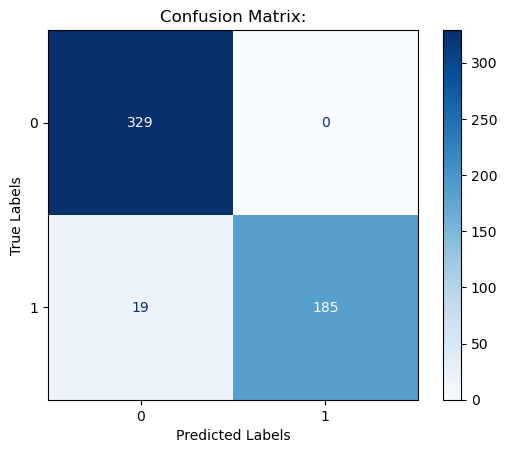

In [39]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#import matplotlib.pyplot as plt

# y_train contains the true labels and y_predictions contains the predicted labels
cm = confusion_matrix(y_train, y_predictions)
display_labels = ['0', '1']  

# Create a ConfusionMatrixDisplay object
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=forest1.classes_)

# Set the colormap and plot the confusion matrix
confusion_matrix_display.plot(cmap=plt.cm.Blues)  

# Add title and axis labels
plt.title("Confusion Matrix:")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()

In [30]:
report = classification_report(y_train, y_predictions, output_dict=True)

print("Tree of depth 10")
pd.DataFrame(report)

Tree of depth 10


,0,1,accuracy,macro avg,weighted avg
precision,0.945402,1.000000,0.964353,0.972701,0.966299
recall,1.000000,0.906863,0.964353,0.953431,0.964353
f1-score,0.971935,0.951157,0.964353,0.961546,0.963982
support,329.000000,204.000000,0.964353,533.000000,533.000000


### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [51]:
def compute_metrics(TN,FP,FN,TP):
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [53]:
#another way
confu = confusion_matrix(y_train,forest1.predict(X_train))
TN = confu[0][0]
FP = confu[0][1]
FN = confu[1][0]
TP = confu[1][1]

In [54]:
confu

array([[329,   0],
       [ 19, 185]])

In [55]:
TN

329

In [56]:
compute_metrics(TN,FP,FN,TP)

Accuracy: 0.9643527204502814

True Positive Rate/Sensitivity/Recall/Power: 0.9068627450980392
False Positive Rate/False Alarm Ratio/Fall-out: 0.0
True Negative Rate/Specificity/Selectivity: 1.0
False Negative Rate/Miss Rate: 0.09313725490196079

Precision/PPV: 1.0
F1 Score: 0.9511568123393317

Support (0): 204
Support (1): 329


In [ ]:
# OR

In [31]:
# .ravel returns a contigious array
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

(329, 0, 19, 185)

In [34]:
# Accuracy
all = TP + FP + FN + TN
acc = (TP + TN) / all
print(f"Accuracy: {round(acc*100, 2)}")

# True positive rate, also recall
TPR = recall = TP/ (TP + FN)
print(f"True Positive Rate: {round(TPR*100, 2)}")

# false positive rate
FPR = FP / (FP + TN)
print(f"False Positive Rate: {round(FPR*100, 2)}")

# true negative rate
TNR = TN / (TN + FP)
print(f"True Negative Rate: {round(TNR*100, 2)}")

# false negative rate
FNR = FN / (FN + TP)
print(f"False Negative Rate: {round(FNR*100, 2)}")

# precision
precision = TP / (TP + FP)
print(f"Precision: {round(precision*100, 2)}")

# f1
f1_score = 2 * (precision*recall) / (precision+recall)
print(f"F1 score: {round(f1_score*100, 2)}")

# support
support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 96.44
True Positive Rate: 90.69
False Positive Rate: 0.0
True Negative Rate: 100.0
False Negative Rate: 9.31
Precision: 100.0
F1 score: 95.12
Support (0): 204
Support (1): 329


### 4.Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [58]:
scores_all = []

for x in range(1,11):
    
    # looping through min_samples_leaf front to back 
    # looping through max_depth back to front
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x) # different if x = 10 vs x = 1
    #fit it
    rf.fit(X_train, y_train)
    #transform it
    train_acc = rf.score(X_train, y_train)
    
    #evaluate on my validate data
    val_acc = rf.score(X_val, y_val)
    
    print(f'min_samples_leaf = {x} max_depth = {11-x}, accuracy = {train_acc, val_acc}')
    
    scores_all.append([x, 11-x, train_acc, val_acc])

min_samples_leaf = 1 max_depth = 10, accuracy = (0.9662288930581614, 0.7865168539325843)
min_samples_leaf = 2 max_depth = 9, accuracy = (0.9174484052532833, 0.7752808988764045)
min_samples_leaf = 3 max_depth = 8, accuracy = (0.8949343339587242, 0.7921348314606742)
min_samples_leaf = 4 max_depth = 7, accuracy = (0.8724202626641651, 0.7865168539325843)
min_samples_leaf = 5 max_depth = 6, accuracy = (0.8611632270168855, 0.7808988764044944)
min_samples_leaf = 6 max_depth = 5, accuracy = (0.8480300187617261, 0.797752808988764)
min_samples_leaf = 7 max_depth = 4, accuracy = (0.8405253283302064, 0.7808988764044944)
min_samples_leaf = 8 max_depth = 3, accuracy = (0.8198874296435272, 0.7752808988764045)
min_samples_leaf = 9 max_depth = 2, accuracy = (0.8086303939962477, 0.7471910112359551)
min_samples_leaf = 10 max_depth = 1, accuracy = (0.7842401500938087, 0.7471910112359551)


In [59]:
scores_all

[[1, 10, 0.9662288930581614, 0.7865168539325843],
 [2, 9, 0.9174484052532833, 0.7752808988764045],
 [3, 8, 0.8949343339587242, 0.7921348314606742],
 [4, 7, 0.8724202626641651, 0.7865168539325843],
 [5, 6, 0.8611632270168855, 0.7808988764044944],
 [6, 5, 0.8480300187617261, 0.797752808988764],
 [7, 4, 0.8405253283302064, 0.7808988764044944],
 [8, 3, 0.8198874296435272, 0.7752808988764045],
 [9, 2, 0.8086303939962477, 0.7471910112359551],
 [10, 1, 0.7842401500938087, 0.7471910112359551]]

In [60]:
scores_df = pd.DataFrame(scores_all, columns =['min_samples_leaf','max_depth','train_acc','val_acc'])
scores_df

,min_samples_leaf,max_depth,train_acc,val_acc
0,1,10,0.966229,0.786517
1,2,9,0.917448,0.775281
2,3,8,0.894934,0.792135
3,4,7,0.872420,0.786517
4,5,6,0.861163,0.780899
5,6,5,0.848030,0.797753
6,7,4,0.840525,0.780899
7,8,3,0.819887,0.775281
8,9,2,0.808630,0.747191
9,10,1,0.784240,0.747191


In [35]:
# for-loop through so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    #creating the model
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=42)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.924953,0.786517,0.138436
1,3,17,0.900563,0.797753,0.102810
2,4,16,0.876173,0.792135,0.084038
3,5,15,0.870544,0.780899,0.089645
4,6,14,0.864916,0.786517,0.078399
5,7,13,0.864916,0.780899,0.084017
6,8,12,0.853659,0.775281,0.078378
7,9,11,0.849906,0.775281,0.074625
8,10,10,0.844278,0.792135,0.052143
9,11,9,0.844278,0.792135,0.052143


### 5.What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [61]:
scores_df['difference'] = scores_df.train_acc - scores_df.val_acc
scores_df.sort_values('difference', ascending=True)

,min_samples_leaf,max_depth,train_acc,val_acc,difference
9,10,1,0.784240,0.747191,0.037049
7,8,3,0.819887,0.775281,0.044607
5,6,5,0.848030,0.797753,0.050277
6,7,4,0.840525,0.780899,0.059626
8,9,2,0.808630,0.747191,0.061439
4,5,6,0.861163,0.780899,0.080264
3,4,7,0.872420,0.786517,0.085903
2,3,8,0.894934,0.792135,0.102800
1,2,9,0.917448,0.775281,0.142168
0,1,10,0.966229,0.786517,0.179712


In [ ]:
# OR

In [40]:
#only using max_depth evaluation matrices
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=42)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.797373,0.741573,0.055800
1,3,0.819887,0.786517,0.033371
2,4,0.848030,0.775281,0.072749
3,5,0.870544,0.786517,0.084027
4,6,0.893058,0.780899,0.112159
5,7,0.921201,0.769663,0.151538
6,8,0.943715,0.786517,0.157198
7,9,0.956848,0.797753,0.159095
8,10,0.964353,0.792135,0.172218
9,11,0.969981,0.780899,0.189082


### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

min_samples_leaf approximately 8 and max-depth approximately 8 performs the best for close metrics


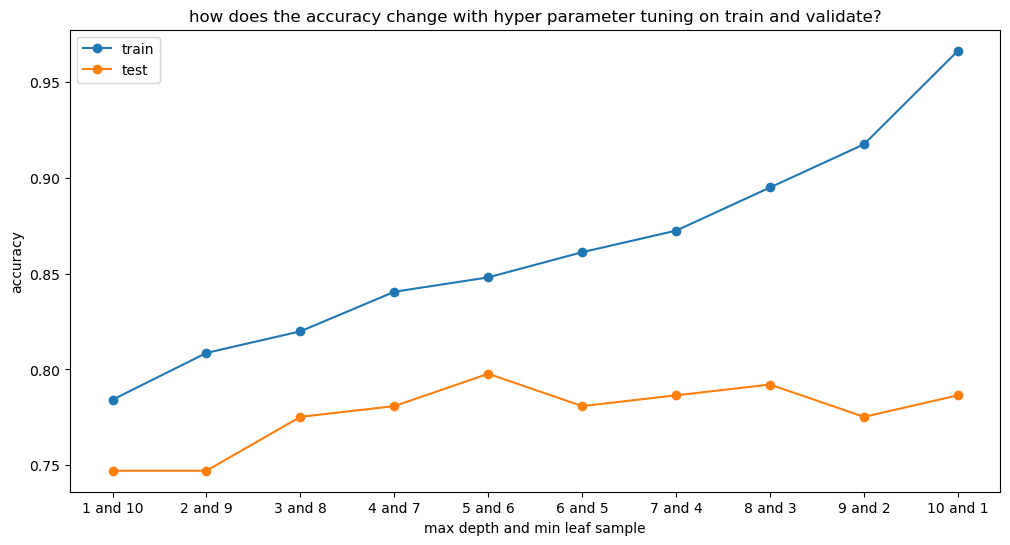

In [62]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='test', marker='o')
plt.xlabel('max depth and min leaf sample')
plt.ylabel('accuracy')

plt.xticks([1,2,3,4,5,6,7,8,9,10],
          [('1 and 10'),('2 and 9'),('3 and 8'),('4 and 7'),('5 and 6'),
          ('6 and 5'),('7 and 4'), ('8 and 3'), ('9 and 2'), ('10 and 1') ]
          )

plt.title('how does the accuracy change with hyper parameter tuning on train and validate?')
plt.legend()
plt.show()

In [63]:
# charts can be misleading, sometimes better to look at a dataframe
scores_df.sort_values('difference')

,min_samples_leaf,max_depth,train_acc,val_acc,difference
9,10,1,0.784240,0.747191,0.037049
7,8,3,0.819887,0.775281,0.044607
5,6,5,0.848030,0.797753,0.050277
6,7,4,0.840525,0.780899,0.059626
8,9,2,0.808630,0.747191,0.061439
4,5,6,0.861163,0.780899,0.080264
3,4,7,0.872420,0.786517,0.085903
2,3,8,0.894934,0.792135,0.102800
1,2,9,0.917448,0.775281,0.142168
0,1,10,0.966229,0.786517,0.179712


In [ ]:
The optimal model had a Max_depth of 1 and min_samples_leaf of 10. This performs best on our in sample data because it has the smallest amount of drop off between its train and test set so were achieving the most balance with this model:

Although we get high validation accuracy for index 2 & 1 they also have a large amoutn of variance between these models


Train Acc: 78.1%


Test Acc: 76.1%

In [ ]:
# OR

In [36]:
#decreasing min samples leaf and increasing max depth
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = max_depth + i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df


,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,22,2,0.797373,0.741573,0.055800
1,23,3,0.803002,0.752809,0.050193
2,24,4,0.812383,0.769663,0.042720
3,25,5,0.812383,0.758427,0.053956
4,26,6,0.806754,0.764045,0.042709
5,27,7,0.806754,0.752809,0.053945
6,28,8,0.808630,0.758427,0.050203
7,29,9,0.804878,0.764045,0.040833
8,30,10,0.803002,0.752809,0.050193
9,31,11,0.793621,0.752809,0.040812


In [41]:
#increasing both min sample leaf and max depth
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.808630,0.752809,0.055821
1,3,3,0.819887,0.769663,0.050225
2,4,4,0.840525,0.775281,0.065244
3,5,5,0.861163,0.775281,0.085882
4,6,6,0.866792,0.780899,0.085893
5,7,7,0.844278,0.786517,0.057761
6,8,8,0.844278,0.792135,0.052143
7,9,9,0.851782,0.792135,0.059648
8,10,10,0.844278,0.792135,0.052143
9,11,11,0.836773,0.786517,0.050256


In [42]:
#fixed max depth and increasing min samples leaf
metrics = []


for i in range(2, 25):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,6,0.872420,0.786517,0.085903
1,3,6,0.874296,0.775281,0.099016
2,4,6,0.857411,0.780899,0.076512
3,5,6,0.861163,0.780899,0.080264
4,6,6,0.866792,0.780899,0.085893
5,7,6,0.851782,0.792135,0.059648
6,8,6,0.846154,0.792135,0.054019
7,9,6,0.846154,0.792135,0.054019
8,10,6,0.840525,0.775281,0.065244
9,11,6,0.838649,0.775281,0.063368
